# Flowers collaboration with kevad (fourms.fast.ai) 

URLs FLOWER dataset 

### Dataset info

* [http://www.robots.ox.ac.uk/~vgg/data/flowers/102/]  
* [https://www.kaggle.com/c/oxford-102-flower-pytorch/overview]


## imports & data setup

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
import pandas as pd

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
URLs.FLOWERS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers'

### download data

In [6]:
path = untar_data(URLs.FLOWERS, dest='./data/')

A new version of the dataset is available.


In [7]:
path

WindowsPath('data/oxford-102-flowers')

In [8]:
path.ls()

[WindowsPath('data/oxford-102-flowers/jpg'),
 WindowsPath('data/oxford-102-flowers/test.txt'),
 WindowsPath('data/oxford-102-flowers/train.txt'),
 WindowsPath('data/oxford-102-flowers/valid.txt')]

- the data schema is different from the cats vs dogs example in the lecture... let's see what these text file contain...

In [9]:
with open('./data/oxford-102-flowers/train.txt', 'r') as fl:
    x = [next(fl) for x in range(10)]

In [10]:
x

['jpg/image_03860.jpg 16\n',
 'jpg/image_06092.jpg 13\n',
 'jpg/image_02400.jpg 42\n',
 'jpg/image_02852.jpg 55\n',
 'jpg/image_07710.jpg 96\n',
 'jpg/image_07191.jpg 5\n',
 'jpg/image_03050.jpg 91\n',
 'jpg/image_07742.jpg 96\n',
 'jpg/image_06523.jpg 25\n',
 'jpg/image_05517.jpg 86\n']

- so they seem to have all images in `jpg` folder and each image has a corresponding `label` attached to it

In [11]:
train_labels = pd.read_csv('./data/oxford-102-flowers/train.txt', delimiter=' ', header=None)
valid_labels = pd.read_csv('./data/oxford-102-flowers/valid.txt', delimiter=' ', header=None)
test_labels = pd.read_csv('./data/oxford-102-flowers/test.txt', delimiter=' ', header=None)

train_labels.columns = ['image', 'label']
valid_labels.columns = ['image', 'label']
test_labels.columns = ['image', 'label']

train_labels.shape
valid_labels.shape
test_labels.shape

(1020, 2)

(1020, 2)

(6149, 2)

- test data is almost 6 times that of train/valid

In [12]:
train_labels.head()

,image,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


## check data

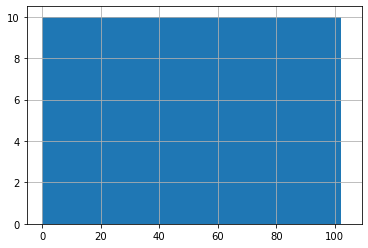

In [14]:
train_labels.label.hist(bins=range(0, 105));

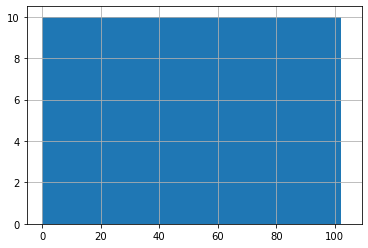

In [15]:
valid_labels.label.hist(bins=range(0, 105));

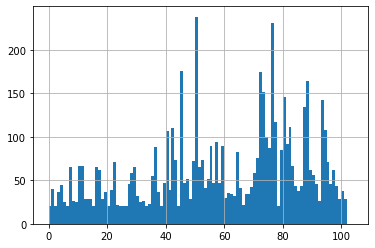

In [16]:
test_labels.label.hist(bins=range(0, 105));

- train & valid data are stratified class wise and also contain same amount of examples per class

In [17]:
train_labels.head()

,image,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [18]:
test_labels.head()

,image,label
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45


### merge train, valid to create `ImageDataBunch` object

In [19]:
bs = 64  # 64 also ran well pretty smoothly with my GTX 1070Ti 8GB card & 16GB RAM

In [20]:
train_valid = pd.concat((train_labels, valid_labels), ignore_index=True)

In [58]:
train_valid = pd.concat((train_labels, test_labels), ignore_index=True)

In [59]:
train_valid

,image,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96
...,...,...
7164,jpg/image_08168.jpg,61
7165,jpg/image_07487.jpg,94
7166,jpg/image_04432.jpg,89
7167,jpg/image_02532.jpg,75


- I couldn't find a way to reliably add `test` data this way as I had to set the `valid_pct` to 0.5 manually as the default is 0.2
  and specifying the test data here, messes up the ratio and some test data is leaking into `train/valid`
- I could however load the test data if I have `train, valid, test` folders with images residing in their resp. label folders
- don't forget to resize the images as they are of high quality and are not standardized.. so different images have difft. dimensions

In [60]:
data = ImageDataBunch.from_df(path, train_valid, ds_tfms=get_transforms(), size=96, bs=bs, valid_pct=.14).normalize(imagenet_stats)

In [30]:
data.batch_stats()

[tensor([-0.0490, -0.3071, -0.4279]), tensor([1.3577, 1.1648, 1.2371])]

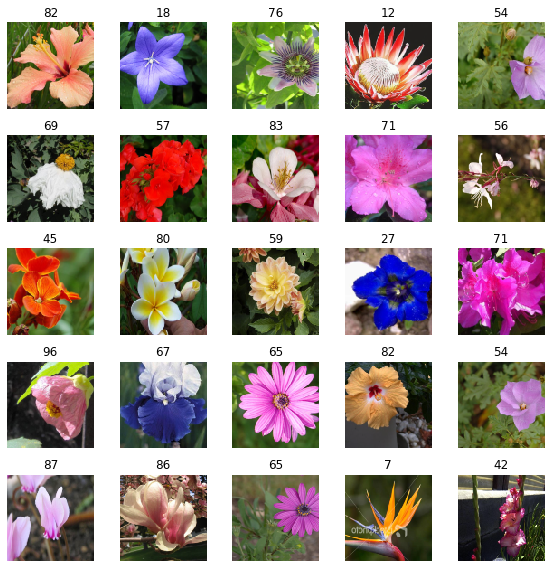

In [61]:
data.show_batch(figsize=(8,8))

In [33]:
data.c

102

- we have 102 classes in total

In [24]:
(path/'jpg').ls()

[WindowsPath('data/oxford-102-flowers/jpg/image_00001.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00002.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00003.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00004.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00005.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00006.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00007.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00008.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00009.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00010.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00011.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00012.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00013.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00014.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00015.jpg'),
 WindowsPath('data/oxford-102-flowers/jpg/image_00016.jpg'),
 WindowsPath('data/oxfor

In [25]:
test_labels

,image,label
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45
...,...,...
6144,jpg/image_08168.jpg,61
6145,jpg/image_07487.jpg,94
6146,jpg/image_04432.jpg,89
6147,jpg/image_02532.jpg,75


In [46]:
data.label_list

LabelLists;

Train: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
91,25,60,6,56
Path: ../../data/oxford-102-flowers;

Valid: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
100,71,65,9,66
Path: ../../data/oxford-102-flowers;

Test: None

## training

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


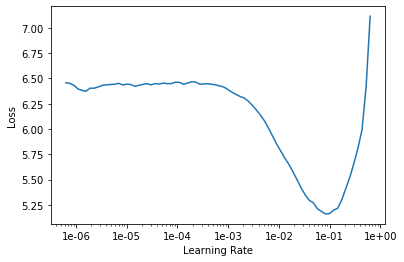

In [63]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(8, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,5.928633,3.652254,0.797059,00:42
1,4.242930,2.775620,0.601961,00:40
2,3.137163,2.547268,0.570588,00:40
3,2.485790,2.050976,0.462745,00:40
4,2.005736,1.768140,0.418627,00:40
5,1.594339,1.537268,0.368627,00:41
6,1.279320,1.386103,0.329412,00:41
7,1.038234,1.349063,0.327451,00:40


In [44]:
learn.save('initial_flower')

In [33]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


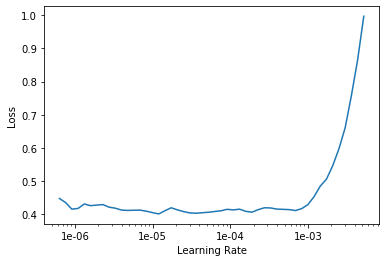

In [34]:
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(6, max_lr=slice(1e-4/2, 1e-2/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.427433,1.230947,0.306863,00:41
1,0.479253,1.658996,0.374510,00:40
2,0.547492,1.746424,0.385294,00:40
3,0.508569,1.368944,0.323529,00:39
4,0.441602,1.131634,0.287255,00:41
5,0.360664,1.096832,0.274510,00:40


In [36]:
learn.fit_one_cycle(1, max_lr=slice(1e-4/2, 1e-2/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.155591,1.168159,0.271569,00:39


In [37]:
learn.save('good_flower')

In [51]:
learn.load('initial_flower')

Learner(data=ImageDataBunch;

Train: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
16,13,5,91,86
Path: data\oxford-102-flowers;

Valid: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
25,82,49,48,65
Path: data\oxford-102-flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [52]:
learn.unfreeze()
learn.fit_one_cycle(7, max_lr=slice(1e-4/2, 1e-2/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.432341,1.349206,0.330392,00:42
1,0.445244,1.584954,0.360784,00:41
2,0.512739,1.824669,0.394118,00:41
3,0.523372,1.468195,0.345098,00:40
4,0.446121,1.319962,0.300000,00:40
5,0.367931,1.124700,0.256863,00:40
6,0.300667,1.091402,0.248039,00:40


In [54]:
learn.fit_one_cycle(1, max_lr=slice(1e-4/2, 1e-2/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.143228,1.091988,0.243137,00:39


In [55]:
learn.save('good_flower')

In [49]:
learn.load('initial_flower')

Learner(data=ImageDataBunch;

Train: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
16,13,5,91,86
Path: data\oxford-102-flowers;

Valid: LabelList (1020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
25,82,49,48,65
Path: data\oxford-102-flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [50]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.439495,1.303258,0.305882,00:40
1,0.372907,1.282003,0.318627,00:40
2,0.341324,1.284680,0.309804,00:42
3,0.325412,1.272080,0.311765,00:41
4,0.288846,1.207342,0.295098,00:40
5,0.250105,1.191268,0.292157,00:42


## results analysis

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

In [76]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [78]:
len(losses)

1020

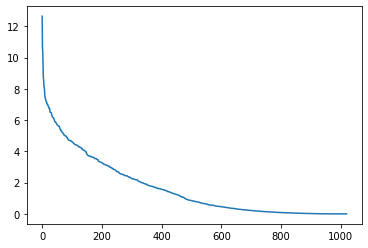

In [79]:
plt.plot(losses)

In [80]:
losses[0]

tensor(12.6441)

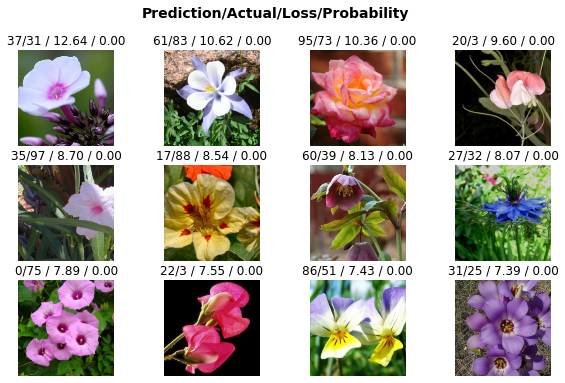

In [87]:
interp.plot_top_losses(12, figsize=(10, 6))

In [91]:
interp.most_confused(3)

[(65, 33, 8),
 (11, 49, 6),
 (75, 74, 5),
 (64, 47, 4),
 (77, 87, 4),
 (28, 12, 3),
 (31, 10, 3),
 (35, 71, 3),
 (63, 74, 3)]

## Unfreezing, fine-tuning, and learning rates

In [93]:
learn.unfreeze()

In [94]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.298813,1.935239,0.470588,00:06


In [98]:
learn.load('initial_flower');

In [99]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


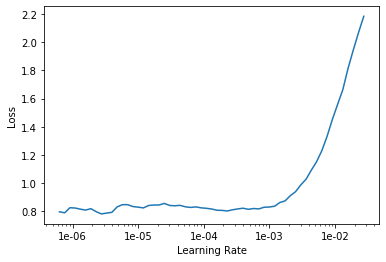

In [100]:
learn.recorder.plot()

In [101]:
learn.unfreeze()

In [102]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.857085,1.585303,0.385294,00:06
1,0.778008,1.494178,0.379412,00:06
2,0.695616,1.380372,0.347059,00:07
3,0.557176,1.246594,0.318627,00:07
4,0.465325,1.215243,0.304902,00:06
5,0.367000,1.210470,0.306863,00:06


In [103]:
learn.save('flower_unfreezed_train')

## train resnet50

- let's train a bigger model to see if and how much it improves the classification score

In [104]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [105]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,5.548954,3.157361,0.707843,00:07
1,3.703213,2.141780,0.518627,00:06
2,2.632042,1.837260,0.466667,00:06
3,1.880846,1.611302,0.427451,00:06
4,1.376008,1.516674,0.395098,00:07
5,1.049283,1.442891,0.362745,00:07
6,0.817854,1.393184,0.349020,00:07
7,0.680187,1.386713,0.349020,00:07


In [106]:
learn.save('init_resnet50')

In [107]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


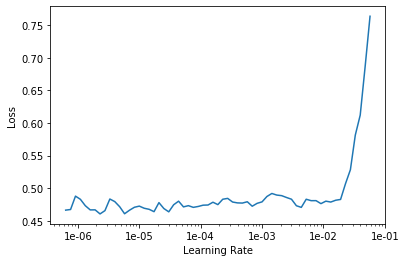

In [108]:
learn.recorder.plot()

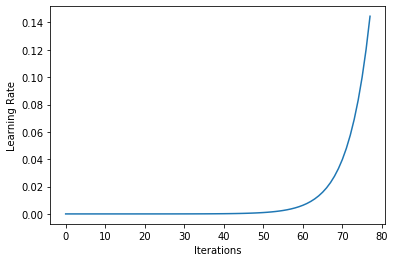

In [110]:
learn.recorder.plot_lr()

In [112]:
interp = ClassificationInterpretation.from_learner(learn)

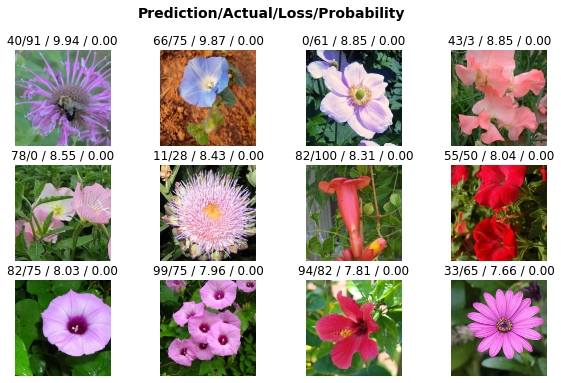

In [113]:
interp.plot_top_losses(12, figsize=(10, 6))

In [114]:
interp.most_confused(3)

[(65, 33, 10),
 (11, 49, 3),
 (21, 37, 3),
 (77, 68, 3),
 (89, 23, 3),
 (94, 3, 3),
 (96, 88, 3)]

### unfreeze and train

In [118]:
learn.load('init_resnet50');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


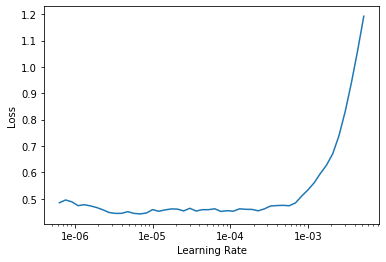

In [119]:
learn.lr_find()
learn.recorder.plot()

In [120]:
learn.unfreeze()

In [121]:
learn.fit_one_cycle(8, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.466122,1.383303,0.338235,00:07
1,0.446268,1.288265,0.328431,00:07
2,0.392093,1.237392,0.307843,00:07
3,0.348900,1.188745,0.302941,00:07
4,0.311522,1.154858,0.293137,00:07
5,0.260329,1.142147,0.285294,00:07
6,0.238308,1.132104,0.293137,00:07
7,0.212595,1.123140,0.294118,00:07


In [122]:
learn.save('reset50_unfreezed')

### predict on _test_ data

In [130]:
test_labels.head()

,image,label
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45


In [131]:
tt = ImageList.from_df(test_labels, path)

In [132]:
tt

ImageList (6149 items)
Image (3, 500, 690),Image (3, 500, 667),Image (3, 500, 752),Image (3, 500, 666),Image (3, 752, 500)
Path: ../../data/oxford-102-flowers

In [165]:
# WARNING: TAKES TIME!!! This is most definitely an inefficient way of calculating the predictions as I couldn't find
# how to add test data to `data` variable yet...
preds = [learn.predict(tt[x])[1].tolist() for x in range(len(tt))]

In [166]:
test_labels['pred'] = preds

In [169]:
test_labels.head()

,image,label,pred
0,jpg/image_06977.jpg,34,34
1,jpg/image_00800.jpg,80,80
2,jpg/image_05038.jpg,58,58
3,jpg/image_06759.jpg,0,0
4,jpg/image_01133.jpg,45,47


In [170]:
test_labels.dtypes

image    object
label     int64
pred      int64
dtype: object

In [177]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [176]:
print(classification_report(test_labels.label, test_labels.pred))

              precision    recall  f1-score   support

           0       0.39      0.75      0.52        20
           1       0.84      0.90      0.87        40
           2       0.17      0.20      0.18        20
           3       0.27      0.61      0.38        36
           4       0.62      0.80      0.70        45
           5       0.61      0.68      0.64        25
           6       0.54      0.95      0.69        20
           7       0.95      0.91      0.93        65
           8       0.50      0.65      0.57        26
           9       0.89      1.00      0.94        25
          10       0.35      0.36      0.36        67
          11       0.88      0.69      0.77        67
          12       0.84      0.93      0.89        29
          13       0.84      0.96      0.90        28
          14       0.61      0.79      0.69        29
          15       0.39      0.76      0.52        21
          16       0.95      0.85      0.89        65
          17       0.65    

In [209]:
accuracy_score(test_labels.label, test_labels.pred)

0.6937713449341356

- so we got around ***~70%*** accuracy on the test dataset

In [179]:
interp = ClassificationInterpretation.from_learner(learn)

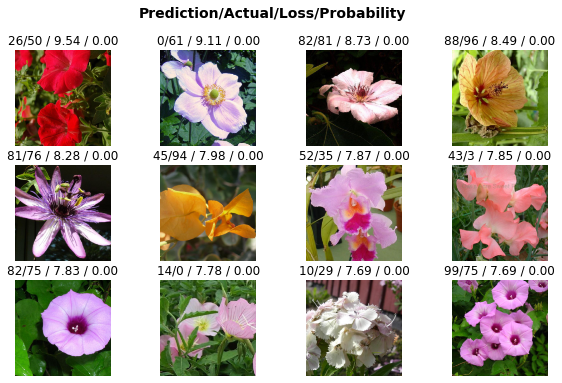

In [187]:
interp.plot_top_losses(12, figsize=(10, 6))

In [185]:
interp.most_confused(3)

[(65, 33, 7), (21, 37, 3), (77, 68, 3), (96, 88, 3)]

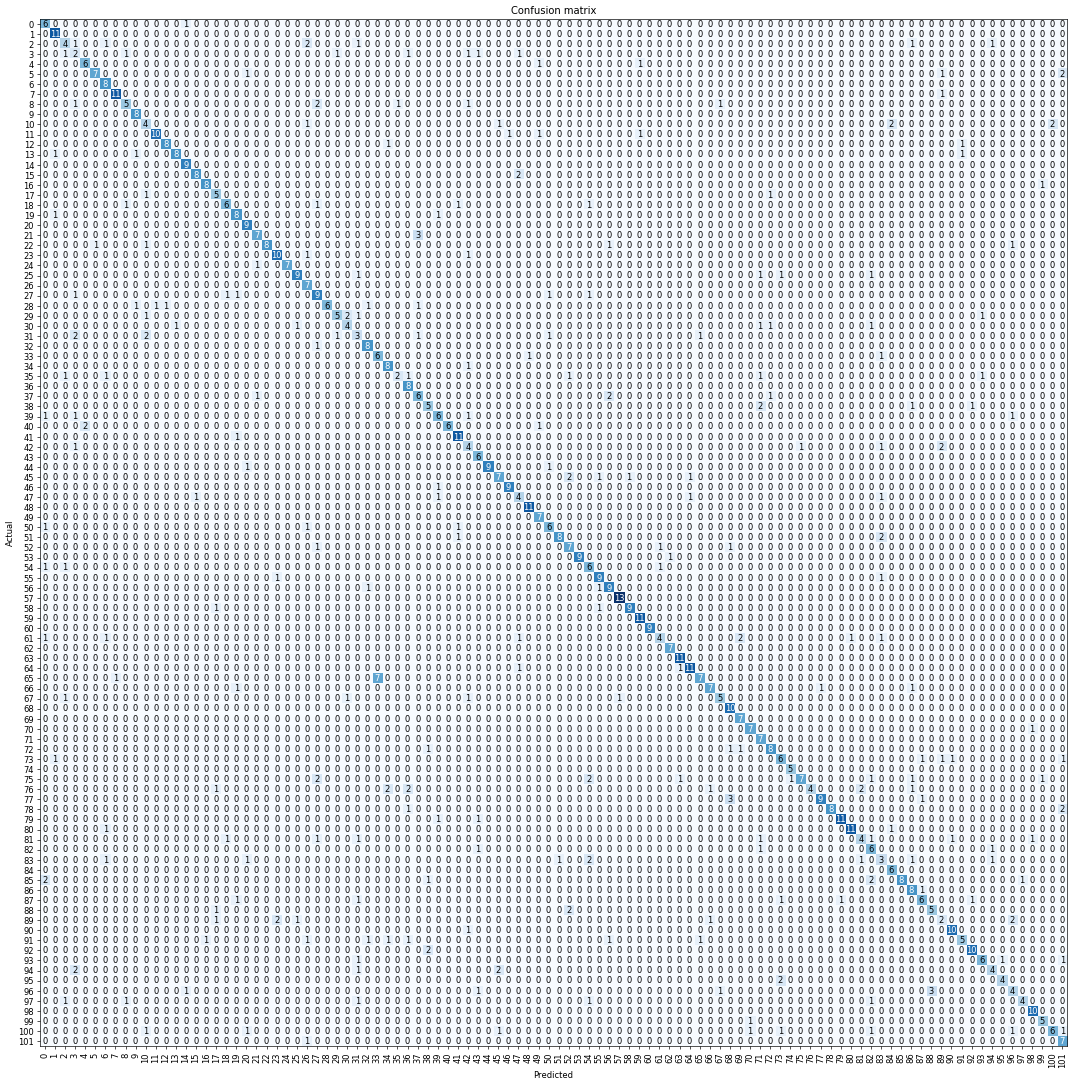

In [190]:
interp.plot_confusion_matrix(dpi=60, figsize=(18, 18))